## Praca domowa 4

#### Autor: Dawid Płudowski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [20]:
df[(df["Publisher"] == "Nintendo") & (df["Year"] > 2015) & (df["NA_Sales"] < df["JP_Sales"])]["Name"].tolist()

['Kirby: Planet Robobot',
 'Mario & Sonic at the Rio 2016 Olympic Games',
 'Mario & Sonic at the Rio 2016 Olympic Games',
 'Disney Art Academy',
 'Culdcept Revolt']

### Odpowiedź:
1. 'Kirby: Planet Robobot',
2. 'Mario & Sonic at the Rio 2016 Olympic Games',
3. 'Mario & Sonic at the Rio 2016 Olympic Games',
4. 'Disney Art Academy',
5. 'Culdcept Revolt'

#### Jak rodzaj gry zarobił najwięcej w roku 2010?

In [32]:
df[df["Year"] == 2010].groupby("Genre").Global_Sales.agg("sum").to_frame().reset_index().sort_values("Global_Sales",
                                                                                                     ascending=False).head(1)

,Genre,Global_Sales
0,Action,117.64


### Odpowiedź: gry akcji

#### Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. 

In [48]:
jp = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean")
jp = jp[jp.EU_Sales < jp.JP_Sales].JP_Sales.reset_index().sort_values("JP_Sales", ascending=False).rename(columns = {"Genre":"Typ Gry",
                                                                            "JP_Sales":"Średnia sprzedaż w Japonii"})

### Odpowiedź: tabela poniżej:

In [49]:
jp

,Typ Gry,Średnia sprzedaż w Japonii
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

## Oryginalny wykres
#### Źródło: [https://www.reddit.com/r/dataisbeautiful/comments/qbqoyr/change_in_net_worth_for_top_20_us_billionaires/](https://www.reddit.com/r/dataisbeautiful/comments/qbqoyr/change_in_net_worth_for_top_20_us_billionaires/)
![](plot.png)

## Wykres z pracy domowej nr 2
#### Link do pracy domowej: [github](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/PludowskiDawid/hw2_PludowskiDawid.pdf)
![](hw2_plot.png)

In [54]:
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv("./data.csv")

In [67]:
data.sort_values("Wealth2021", ascending = True, inplace = True)

## Wykres poprawiony w Pythonie

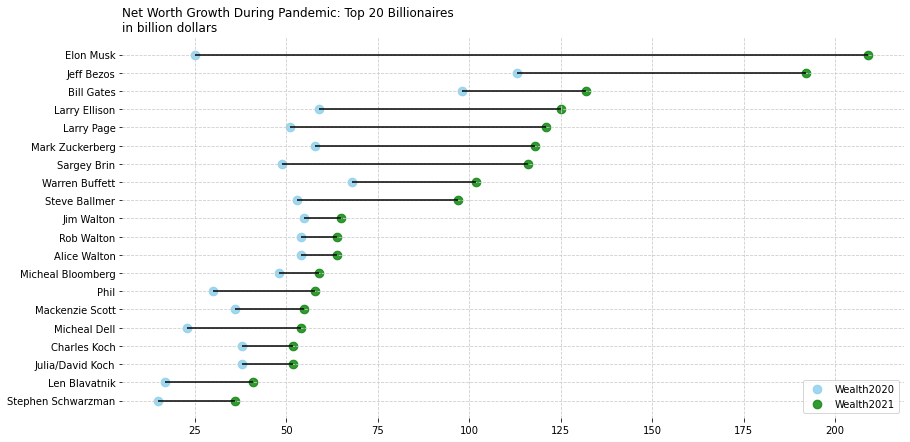

In [94]:
my_range=range(1,len(data.index)+1)

plt.figure(figsize=(14,7))
 
plt.scatter(data['Wealth2020'], my_range, color='skyblue', alpha=0.8, label='Wealth2020', s = 75)
plt.scatter(data['Wealth2021'], my_range, color='green', alpha=0.8 , label='Wealth2021', s = 75)
plt.hlines(y=my_range, xmin=data['Wealth2020'], xmax=data['Wealth2021'], color='#000000', alpha=1)
plt.legend()
 
plt.yticks(my_range, data['Name'])
plt.title("Net Worth Growth During Pandemic: Top 20 Billionaires\nin billion dollars", loc='left')
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(color = "#cccccc", linestyle = '--')

plt.show()

## Motywacja
Różnice pomiędzy wykresem oryginalnym a poprawionym zostały omówione wcześniej w [*pracy domowej nr 2*](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/PludowskiDawid/hw2_PludowskiDawid.pdf) i zostają aktualne również i w wersji wykresu wykonanej w `Pythonie`. W porównaniu do poprzedniej wersji nowy wykres cechuje się:
* neutralnymi kolorami kropek (w poprzedniej wersji kontrast czerwony-zielony mógł sugerować czytelnikowi różnice jakościowe dobry-zły, co nie było zamiarem wizualizacji);
* gęstszym rozmieszczeniem oznaczeń wartości na osi X, co zwiększa czytelność wykresu; 
* kreskowanymi liniami pomocniczymi, które mniej rozpraszają obserwatora od linii lizaków;
* grubszymi kreskami lizaków, które w poprzedniej wersji były tej samej grubości, co linie pomocnicze;
* większymi kropkami na końcach lizaków;

Podsumowując, różnice pomiędzy wykresem wykonanym w `R` a `Python` są przede wszystkim natury kosmetycznej, zwiększają czytelność i eliminują ewentualne niejsności wynikające z doboru kolorów.